## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report 

## Loading Dataset

In [3]:
hds = pd.read_csv('/home/laiba/Machine-Learning-Essentials/Datasets/HDS_pp_v2.csv')

In [4]:
features = hds[['ChestPainType_ATA', 'RestingBP']]
features

,ChestPainType_ATA,RestingBP
0,1.0,140
1,0.0,160
2,1.0,130
3,0.0,138
4,0.0,150
...,...,...
913,0.0,110
914,0.0,144
915,0.0,130
916,1.0,130


In [5]:
target = hds['HeartDisease']
target

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

## Standardize features 

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
features_standardized = scaler.fit_transform(features) 

In [23]:
features_standardized

array([[ 2.07517671,  0.41090889],
       [-0.48188667,  1.49175234],
       [ 2.07517671, -0.12951283],
       ...,
       [-0.48188667, -0.12951283],
       [ 2.07517671, -0.12951283],
       [-0.48188667,  0.30282455]])

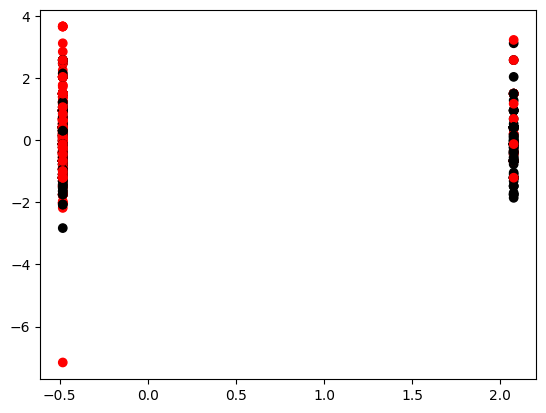

In [24]:
# Plot data points and color using their class - state space diagram
color = ["black" if c == 0 else "red" for c in target] 
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

In [25]:
from sklearn.svm import LinearSVC

# Create support vector classifier 
svc = LinearSVC(C=1.0) 
# Train model 
model = svc.fit(features_standardized, target)

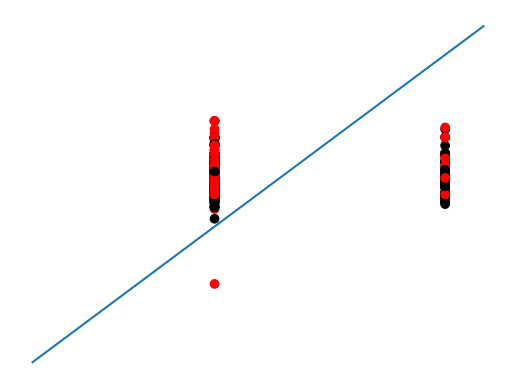

In [26]:
# Create the hyperplane 
w = svc.coef_[0] 
a = -w[0] / w[1]  # w[0] and w[1] are associated weights of the two features
xx = np.linspace(-2.5, 2.5) 
yy = a * xx - (svc.intercept_[0]) / w[1] 

# Plot the hyperplane 
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)
plt.plot(xx, yy) 
plt.axis("off"), plt.show();

In [27]:
# Create new observation 
new_observation = [[4.9, 3.1]] 
# Predict class of new observation 
svc.predict(new_observation) 

array([0])

Incorect prediction as the observation is not normalized

In [28]:
new_observation_std = scaler.transform(new_observation)
print(new_observation_std)
svc.predict(new_observation_std) 

[[12.04772391 -6.9874645 ]]


/home/laiba/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

## Handling Linearly Inseparable Classes using Kernels

### Generating Linearly Inseparable Data

For linearly Inseparable data , we can use radial Base Function.

I can consider output of AND gate this way .

Output of AND Gate is the minimum of the two inputs.

Output of OR Gate is the maximum of the two inputs.

here in XOR we can't do that.
so we take range of values , output of XOR is the invert of the two.
We're gonna genrate the random values 


In [13]:
# Set randomization seed
np.random.seed(0)  
# Generate two features 
features_ = np.random.randn(200, 2) 
# Use a XOR gate to generate linearly inseparable classes 
target_xor = np.logical_xor(features_[:, 0] > 0, features_[:, 1] > 0) 
target_ = np.where(target_xor, 0, 1) 

In [14]:
features_

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [15]:
target_

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1])

### Using Linear Kernel

In [16]:
# Load libraries 
from sklearn.svm import SVC 
from mlxtend.plotting import plot_decision_regions 
# mlxtend: ML extensions

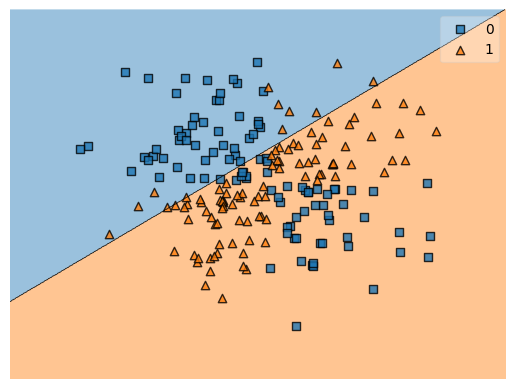

In [17]:
# Create support vector classifier with a linear kernel 
svc_linear = SVC(kernel="linear", random_state=0, C=1) 

# Train model 
model_linear=svc_linear.fit(features_, target_)

# Plot observations and hyperplane 
plot_decision_regions(features_, target_, clf=svc_linear) 
plt.axis("off"), plt.show(); 

In [18]:
# Predictions 
target_pred_linear = model_linear.predict(features_) 
target_pred_linear

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [19]:
# Printing results
print("The accuracy is "+str(metrics.accuracy_score(target_,target_pred_linear)*100)+"%") 
print(confusion_matrix(target_,target_pred_linear))  
target_names = ['class 0', 'class 1'] 
print(classification_report(target_,target_pred_linear, target_names=target_names)) 

The accuracy is 67.0%
[[47 54]
 [12 87]]
              precision    recall  f1-score   support

     class 0       0.80      0.47      0.59       101
     class 1       0.62      0.88      0.72        99

    accuracy                           0.67       200
   macro avg       0.71      0.67      0.66       200
weighted avg       0.71      0.67      0.66       200



Accuracy with this strategy is not good , so we're gonna try RBF for linearly inseparable data

### Using RBF Kernel

Gonna SVM Classifier . 

train the model over the previously generated random data

Now , if we plot it decison boundary are radial object

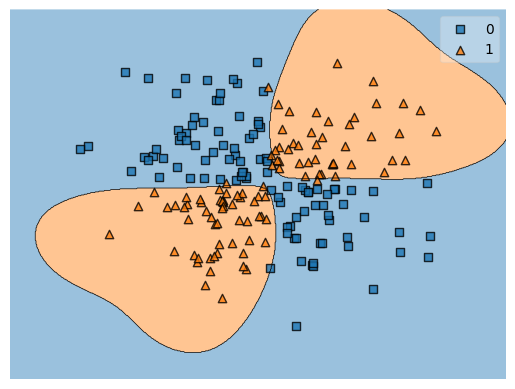

In [20]:
# Create a support vector machine with a radial basis function (RBF) kernel 
svc_rbf = SVC(kernel="rbf", random_state=0, gamma=1, C=1) 

# Train the classifier 
model_svc=svc_rbf.fit(features_, target_) 

# Plot observations and hyperplane 
plot_decision_regions(features_, target_, clf=svc_rbf) 
plt.axis("off"), plt.show(); 

It is good in detecting clas 0 , but not class 1.(consider precison  recall )

### Identifying Support Vectors


To commpute SV's only two input features were there out of four

Now we will be using four input features we won't be able to visualize that , as it is a hyperplane.

In [21]:
#Load data with only two classes, but all 4 features
iris = datasets.load_iris() 
features = iris.data[:100,:] 
target = iris.target[:100] 

# Standardize features 
scaler = StandardScaler() 
features_standardized = scaler.fit_transform(features) 

# Create support vector classifier object 
svc_ = SVC(kernel="linear", random_state=0) 

# Train classifier 
model_ = svc_.fit(features_standardized, target) 

# View support vectors 
model_.support_vectors_ 

NameError: name 'datasets' is not defined

### Taining SVM Regressor

In [ ]:
from sklearn.model_selection import train_test_split 

# Load data with only two features 
#boston = datasets.load_boston()  # removed from sklearn
#features = boston.data[:,0:2] 
#target = boston.target 

#loading the dataset from the csv file
boston=pd.read_csv('Boston_Dataset.csv')

#Creating a dataframe for the features
features_r=boston.drop(['PRICE'],axis=1)

#Creating a series for the target
target_r=boston['PRICE']

FileNotFoundError: [Errno 2] No such file or directory: 'Boston_Dataset.csv'

In [ ]:
features_r

In [ ]:
target_r

In [ ]:
from sklearn.svm import SVR 

X_train,X_test,Y_train,Y_test = train_test_split(features_r,target_r,test_size=0.50,random_state=0) 

# Create decision tree classifier object 
regressor = SVR(kernel='linear') 
regressor.fit(X_train, Y_train) 

# Make predictions
Y_pred_r = regressor.predict(X_test)

In [ ]:
Y_pred_r

In [ ]:
# Finding R-squared score
regressor.score(features_r,target_r)